In [1]:
# Import basic libraries
from palmerpenguins import load_penguins
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import time
from sklearn.preprocessing import LabelEncoder
import os
os.chdir("/Users/hoangthuyduongvu/Desktop/FuzzSIM")


In [2]:
# Import personalized libraries
from fuzz.src.capacity import *
from fuzz.choquet.choquet import *
from fuzz.src.norm import *
from fuzz.src.knn import KNNFuzz
from fuzz.src.sim import S1, S2, S3
from fuzz.optim import *
from fuzz.utils import *
from fuzz.eval import leave_one_out
from fuzz.dataloader import *
from fuzz.choquet.d_choquet import *

In [ ]:
# Load data 
iris_data = load_iris()
iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris['target'] = iris_data.target
data, labels = iris.iloc[:, :-1].values, iris.iloc[:, -1].values
data = batch_norm(np.array(data, dtype=np.float32))

# data, labels = dynamic_generate_positive_gaussian_data(
#     dim=3,
#     nb_classes=3,
#     nb_points_per_class=100,
#     seed=42
# )
# data = batch_norm(data)
# data[:5]
data

array([[1.        , 0.67346936, 0.24489795, 0.        ],
       [1.        , 0.59574461, 0.25531912, 0.        ],
       [1.        , 0.66666669, 0.24444443, 0.        ],
       [1.        , 0.65909088, 0.29545453, 0.        ],
       [1.        , 0.70833325, 0.24999997, 0.        ],
       [1.        , 0.69999999, 0.26000002, 0.        ],
       [1.        , 0.72093034, 0.25581396, 0.        ],
       [1.        , 0.66666663, 0.27083331, 0.        ],
       [1.        , 0.64285713, 0.28571424, 0.        ],
       [1.        , 0.625     , 0.29166666, 0.        ],
       [1.        , 0.67307687, 0.24999997, 0.        ],
       [1.        , 0.69565213, 0.30434778, 0.        ],
       [1.        , 0.61702126, 0.27659571, 0.        ],
       [1.        , 0.69047618, 0.23809522, 0.        ],
       [1.        , 0.6785714 , 0.17857142, 0.        ],
       [1.        , 0.75471699, 0.20754719, 0.        ],
       [1.        , 0.69999999, 0.17999999, 0.        ],
       [1.        , 0.66666675,

In [5]:
# features = data[0]

# mobius = generate_mobius(features, 2)
# mobius.pop(0)
# print(len(mobius))
# capacity = mobius_to_capacity(mobius, features)

# print("Möbius:")
# for i in range(len(mobius)):
#     print(f"Mobius of {mobius[i].X} is {mobius[i].mu:.3f}")

# print("\nDerived Capacity:")
# for c in capacity:
#     print(f"Capacity of {c.X} is {c.mu:.3f}")


In [6]:
# mutated_mobius = mutate(mobius, mutation_rate=0.2)
# print("\nMutated Möbius:")
# for i in range(len(mutated_mobius)):
#     print(f"Mobius of {mutated_mobius[i].X} is {mutated_mobius[i].mu:.3f}")

In [7]:
# Generate all possible mobius for training
features = list(range(len(data[0])))    # encode features as integers

nb_total = 10

# Input Mobius (10 mobius currently)
lst_mobius = []
for i in range(nb_total):
    mobius = generate_mobius(features, 2)
    mobius.pop(0)
    lst_mobius.append(mobius)

# Mutate all mobius
mutated = []
for i in range(len(lst_mobius)):
    mobius = lst_mobius[i]
    mutated_mobius = mutate(mobius, mutation_rate=0.2)
    mutated.append(mutated_mobius)

# Add mutated mobius to the list
lst_mobius.extend(mutated)

# Cross over all mobius
crossed_over = []
for i in range(len(lst_mobius)):
    for j in range(i + 1, len(lst_mobius) // 2):
        crossed = crossover(lst_mobius[i], lst_mobius[j])
        crossed_over.append(crossed)

# Add crossed over mobius to the list
lst_mobius.extend(crossed_over)
print(f"Total number of Möbius measures: {len(lst_mobius)}")

# Convert all Möbius measures to capacities
capacities_list = []
for i in range(len(lst_mobius)):
    mobius = lst_mobius[i]
    capacity = mobius_to_capacity(mobius, features)
    capacities_list.append(capacity)    
print('Test Möbius measures completed!')
print(f"Total number of capacities: {len(capacities_list)}")

Total number of Möbius measures: 65
Test Möbius measures completed!
Total number of capacities: 65


In [8]:
for i in range(len(lst_mobius)):
    mobius = lst_mobius[i]
    tmp = [mobius[j].mu for j in range(len(mobius))]
    print(f"Mobius {i + 1}: {tmp}")

Mobius 1: [0.18511727684373214, 0.49221776861522926, 0.12650217062279756, 0.1317262783936376, 0.7837016334727961, 0.33995184506958487, 0.5804871431808375, 0.9713396641108958, 0.6323578571580285, 0.9837997259690696]
Mobius 2: [0.3993528533432976, 0.15250078810195378, 0.5890246452922526, 0.15481334052393514, 0.24385894740792569, 0.4836544617281706, 0.06143553822435943, 0.6564554038746349, 0.08036939444232849, 0.17210253460345504]
Mobius 3: [0.13143093580711807, 0.03251811433826046, 0.6935364962191438, 0.037878344289924315, 0.880506866822146, 0.10138615770369253, 0.5907100836154197, 0.577670380707984, 0.31138397299374754, 0.0972560469073751]
Mobius 4: [0.9714656295410531, 0.08476273988993521, 0.14188833681529367, 0.666972011045148, 0.38342828530937234, 0.9938493997754883, 0.8599914687374866, 0.09263112304883936, 0.32458366260352056, 0.8787376135019677]
Mobius 5: [0.42761138293700773, 0.9969045777247467, 0.8333054123277466, 0.6043843170433261, 0.25092787886905754, 0.18465650117582644, 0.13

In [9]:
for i in range(len(capacities_list)):
    mobius = capacities_list[i]
    tmp = [mobius[j].mu for j in range(len(mobius))]
    print(f"Mobius {i + 1}: {tmp}")

# All different capacities

Mobius 1: [np.float64(0.0), np.float64(0.03541422340042154), np.float64(0.09416468476959954), np.float64(0.024200745643291815), np.float64(0.025200153817497954), np.float64(0.27950648489485447), np.float64(0.1246501229307418), np.float64(0.17166560766051292), np.float64(0.3041894682824199), np.float64(0.2403392976123925), np.float64(0.2376086338806999), np.float64(0.5545664222947033), np.float64(0.5367323281802409), np.float64(0.44910924161074334), np.float64(0.6385718155451231), np.float64(1.0)]
Mobius 2: [np.float64(0.0), np.float64(0.1334036392951453), np.float64(0.050942819007956046), np.float64(0.19676341525715896), np.float64(0.05171532609428433), np.float64(0.2658074289373474), np.float64(0.49173160784324516), np.float64(0.2056414790326218), np.float64(0.46699486380336314), np.float64(0.12950550481632514), np.float64(0.3059695148761867), np.float64(0.8434240270236952), np.float64(0.3648926283889086), np.float64(0.6214602211054651), np.float64(0.6030483231364756), np.float64(1.0)

In [11]:
mobius = lst_mobius[0]
print("Möbius:")
for i in range(len(mobius)):
    print(f"Mobius of {mobius[i].X} is {mobius[i].mu:.3f}")

capacity = capacities_list[0]
print("\nDerived Capacity:")
for c in capacity:
    print(f"Capacity of {c.X} is {c.mu:.3f}")


Möbius:
Mobius of [0] is 0.185
Mobius of [1] is 0.492
Mobius of [2] is 0.127
Mobius of [3] is 0.132
Mobius of [0, 1] is 0.784
Mobius of [0, 2] is 0.340
Mobius of [0, 3] is 0.580
Mobius of [1, 2] is 0.971
Mobius of [1, 3] is 0.632
Mobius of [2, 3] is 0.984

Derived Capacity:
Capacity of [] is 0.000
Capacity of [0] is 0.035
Capacity of [1] is 0.094
Capacity of [2] is 0.024
Capacity of [3] is 0.025
Capacity of [0, 1] is 0.280
Capacity of [0, 2] is 0.125
Capacity of [0, 3] is 0.172
Capacity of [1, 2] is 0.304
Capacity of [1, 3] is 0.240
Capacity of [2, 3] is 0.238
Capacity of [0, 1, 2] is 0.555
Capacity of [0, 1, 3] is 0.537
Capacity of [0, 2, 3] is 0.449
Capacity of [1, 2, 3] is 0.639
Capacity of [0, 1, 2, 3] is 1.000


In [12]:
import copy

In [22]:
C = KNNFuzz(input_dimension = data.shape[1], mu=mobius, sim=S1, choquet_version='d_choquet', p=1, q=2)
C.train(data, labels)
C.score(data[0])

np.int64(1)

In [33]:
# Fuzzy verion
def FuzzLOO(DS, mu, sim = S1, choquet_version='d_choquet', p=1, q=1, time_counter=False):
    """ Classifieur * tuple[array, array] -> float
    """
    ###################### A COMPLETER 
    pt = 0
    Xm, Ym = DS

    input_dimension= Xm[0].shape[0]

    C = KNNFuzz(input_dimension = input_dimension, mu=mu, sim=sim, choquet_version=choquet_version, p=p, q=q)

    if time_counter:
        tic = time.time()
    for i in range(len(Xm)):
        Xtest, Ytest = Xm[i], Ym[i]
        
        Xapp, Yapp = np.array(list(Xm[:i])+list(Xm[i+1:])), np.array(list(Ym[:i])+list(Ym[i+1:]))

        cl = copy.deepcopy(C)
        cl.train(desc_set=Xapp, label_set=Yapp)

        if cl.accuracy([Xtest], [Ytest]) == 1: pt += 1

    if time_counter:
        toc = time.time()
        print(f'Result in {(toc-tic):0.4f} seconds.')
    
    return pt/len(Xm)

In [34]:
FuzzLOO(
    # C=C,
    DS=(data, labels),
    mu=lst_mobius[64],
)

0.6666666666666666

In [35]:
def fitness_function(capacities_list: np.ndarray, DS: Tuple[np.ndarray, np.ndarray], sim = S1, choquet_version='d_choquet', p=1, q=1, time_counter=False, verbose=False) -> np.ndarray:
    """
    Objective function for optimizing Möbius measures:
    - capacities_list: list of Möbius measures represented as capacities
    - DS: Tuple (X_data, y_data)
    - C: Choquet similarity function (e.g., Choquet_classic)
    
    Returns:
    - 1D array of negative LOO accuracy (to minimize)
    """
    results = []
    i = 0
    # Replace capacities computation with Mobius instead
    # Isolate Classifier outside please
    for capacity in capacities_list:
        i += 1
        if not is_monotonic(capacity):
            results.append(float('inf'))  # Penalize non-monotonic capacity
            continue

        acc = FuzzLOO(DS, capacity, sim=sim, choquet_version=choquet_version, p=p, q=q, time_counter=time_counter)

        # negative accuracy for minimization
        results.append(-acc)

        if verbose: 
            print(f"Processing capacity {i}/{len(capacities_list)}...")
            tmp = [capacity[j].mu for j in range(len(capacity))]
            print(f"Capacities {i}: {tmp}")
            print(f"Accuracy: {acc:.4f}\n")

    return np.array(results)

In [37]:
FF_res = fitness_function(
    # C = C,
    capacities_list=capacities_list,
    DS=(data, labels),
    sim=S1,
    choquet_version='d_choquet',
    p=1,
    q=1,
    time_counter=False, 
    verbose=True
)

Processing capacity 1/65...
Capacities 1: [np.float64(0.0), np.float64(0.03541422340042154), np.float64(0.09416468476959954), np.float64(0.024200745643291815), np.float64(0.025200153817497954), np.float64(0.27950648489485447), np.float64(0.1246501229307418), np.float64(0.17166560766051292), np.float64(0.3041894682824199), np.float64(0.2403392976123925), np.float64(0.2376086338806999), np.float64(0.5545664222947033), np.float64(0.5367323281802409), np.float64(0.44910924161074334), np.float64(0.6385718155451231), np.float64(1.0)]
Accuracy: 0.6600

Processing capacity 2/65...
Capacities 2: [np.float64(0.0), np.float64(0.1334036392951453), np.float64(0.050942819007956046), np.float64(0.19676341525715896), np.float64(0.05171532609428433), np.float64(0.2658074289373474), np.float64(0.49173160784324516), np.float64(0.2056414790326218), np.float64(0.46699486380336314), np.float64(0.12950550481632514), np.float64(0.3059695148761867), np.float64(0.8434240270236952), np.float64(0.3648926283889086

In [38]:
# Get the best capacity
best_index = np.argmin(FF_res)
best_capacity = capacities_list[best_index]
print(f"Best capacity index: {best_index}, Accuracy: {-FF_res[best_index]:.4f}")

# get best mobius
best_mobius = lst_mobius[best_index]
print(f"Best Möbius measure: {[f'{m.X}: {m.mu:.3f}' for m in best_mobius]}")

Best capacity index: 1, Accuracy: 0.6667
Best Möbius measure: ['[0]: 0.399', '[1]: 0.153', '[2]: 0.589', '[3]: 0.155', '[0, 1]: 0.244', '[0, 2]: 0.484', '[0, 3]: 0.061', '[1, 2]: 0.656', '[1, 3]: 0.080', '[2, 3]: 0.172']


In [39]:
# get mobius
for i in range(len(capacities_list[best_index])):
    print(capacities_list[best_index][i].X, capacities_list[best_index][i].mu)

[] 0.0
[0] 0.1334036392951453
[1] 0.050942819007956046
[2] 0.19676341525715896
[3] 0.05171532609428433
[0, 1] 0.2658074289373474
[0, 2] 0.49173160784324516
[0, 3] 0.2056414790326218
[1, 2] 0.46699486380336314
[1, 3] 0.12950550481632514
[2, 3] 0.3059695148761867
[0, 1, 2] 0.8434240270236952
[0, 1, 3] 0.3648926283889086
[0, 2, 3] 0.6214602211054651
[1, 2, 3] 0.6030483231364756
[0, 1, 2, 3] 1.0


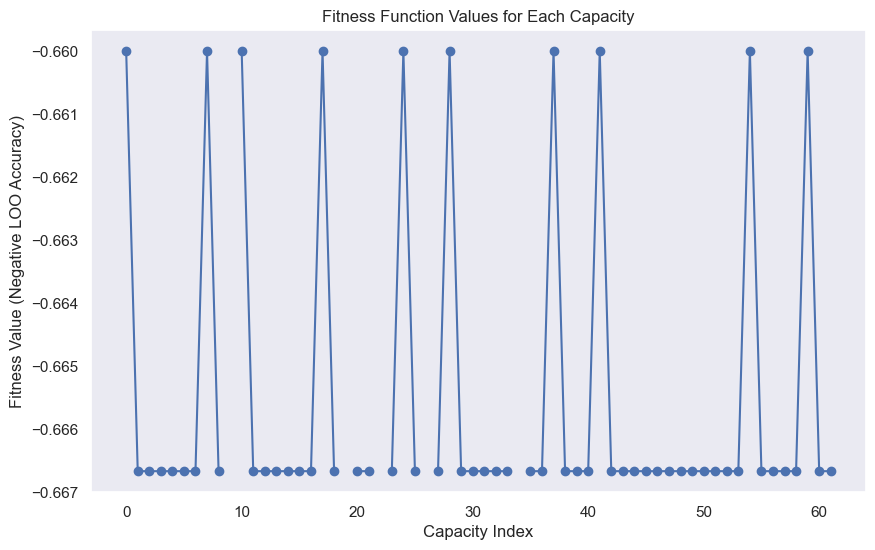

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(capacities_list)), FF_res, marker='o')
plt.title('Fitness Function Values for Each Capacity')
plt.xlabel('Capacity Index')
plt.ylabel('Fitness Value (Negative LOO Accuracy)')
plt.grid()
plt.show()